In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [2]:
bottle=pd.read_csv('/Users/rissu/bottle.csv')
cast=pd.read_csv('/Users/rissu/cast.csv')


C:\Users\rissu\anaconda3\envs\Tensor_flow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\rissu\anaconda3\envs\Tensor_flow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cast.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


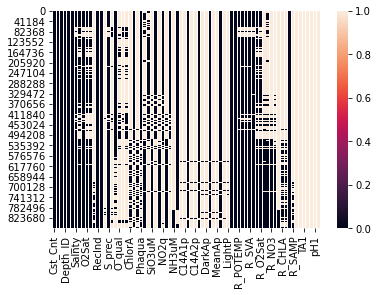

In [6]:
sns.heatmap(bottle.isnull())

In [7]:
bottle.shape,cast.shape

((864863, 74), (34404, 61))

In [44]:
a=bottle.isnull().sum()>100000

In [45]:
drop=a[a==True]

In [46]:
x=bottle[drop.index]

In [47]:
x.shape

(864863, 50)

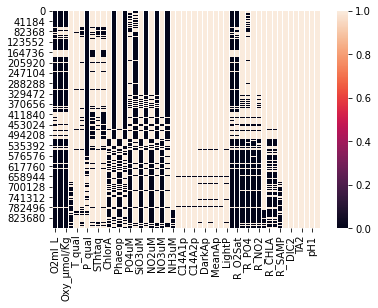

In [48]:
sns.heatmap(x.isnull())

In [49]:
x.isnull().sum()

O2ml_L                 168662
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
T_qual                 841736
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
NO2q                   335389
NO3uM                  527460
NO3q                   334930
NH3uM                  799901
C14As1                 850431
C14A1p                 852103
C14As2                 850449
C14A2p                 852121
DarkAs                 842214
DarkAp                 844406
MeanAs                 842213
MeanAp                 844406
IncTim                 850426
LightP                 846212
R_O2      

In [50]:
data1=bottle.copy()

In [51]:
data1.drop(x.columns,axis=1,inplace=True)

In [52]:
data1.isnull().sum() 

Cst_Cnt           0
Btl_Cnt           0
Sta_ID            0
Depth_ID          0
Depthm            0
T_degC        10963
Salnty        47354
STheta        52689
RecInd            0
T_prec        10963
S_prec        47354
NH3q          56564
C14A1q        16258
C14A2q        16240
DarkAq        24423
MeanAq        24424
R_Depth           0
R_TEMP        10963
R_POTEMP      46047
R_SALINITY    47354
R_SIGMA       52856
R_SVA         52771
R_DYNHT       46657
R_PRES            0
dtype: int64

In [55]:
data1.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20


In [58]:
data1.groupby('Sta_ID')['Sta_ID'].count()

Sta_ID
001.0 168.0       37
001.0 263.5       55
002.0 065.7       34
004.0 086.0       38
004.0 088.0      116
004.0 099.0       46
004.0 104.0       38
004.0 121.0      143
004.0 138.5       38
004.0 155.7       19
004.0 156.5       19
004.0 172.7       19
004.0 173.0       19
004.0 188.5       65
004.0 190.0       90
004.0 209.7       19
004.0 227.0       19
004.0 263.7      180
005.0 204.0       46
005.0 333.0      158
006.0 079.0      124
006.7 134.0       39
006.7 305.5       68
008.0 070.0       86
008.0 114.0       36
009.0 062.0       54
009.5 192.0       19
010.0 010.0       76
010.0 020.0      150
010.0 030.0       38
010.0 039.0       46
010.0 040.0       38
010.0 050.0       38
010.0 060.0       74
010.0 068.0      108
010.0 080.0       56
010.0 099.0       37
011.0 053.0       85
012.0 172.0       38
012.7 085.0       36
013.0 173.7       19
013.3 044.0       55
013.3 274.0       38
014.0 036.0       58
014.0 256.0       56
015.0 105.0      137
016.0 027.0      100
016.0 

In [60]:
data1.shape

(864863, 24)

In [63]:
data1.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

In [64]:
data2=data1.copy()
data2.drop(['Sta_ID','Depth_ID'],axis=1,inplace=True)

In [65]:
data2.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'RecInd',
       'T_prec', 'S_prec', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq',
       'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA',
       'R_DYNHT', 'R_PRES'],
      dtype='object')

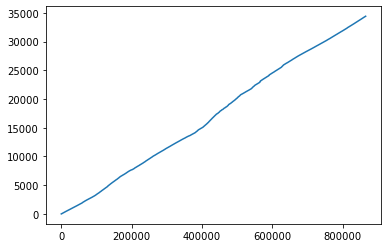